<a href="https://colab.research.google.com/github/MateoUsme/Esp_Analitica/blob/main/08_%5BTALLER%5D_DATAFRAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-03-BIGDATA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

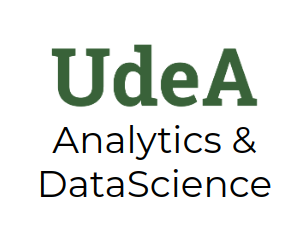

In [50]:
Image("local/imgs/udea-datascience.png")

In [51]:
#Instalación
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz 
!pip install -q findspark

#Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

#SparkContext
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

# **TALLER 3: DATAFRAME**
## Desarrollado por: Mg. Efraín Alberto Oviedo
## Universidad de Antioquia

Por favor, ingrese la siguiente información:

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

#**Pacientes sometidos a cirugías por tumores malignos**

Se dispone de un conjunto de datos (pacientes.json) que contiene datos socio demográficos de pacientes que fueron sometidos a procedimientos quirúrgicos durante los años 2007 a 2018 y cuyos Códigos Internacionales de Enfermedades (CIE-10) correspondía a tumores malignos. Tomado de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Perfil-socio-demogr-fico-pacientes-sometidos-a-cir/i45c-f4fs


Por cada paciente, se dispone de los siguientes atributos:
 
* DiagnosticoAgrupado: Nombre del Grupo de Diagnóstico Agrupado
* Cirugia: Descripción del Procedimiento Quirúrgico
* TipoAtencion: Tipo de atención que generó el procedimiento (Urgencia-Programada)
* Edad: Edad en años del paciente
* Subregion: Subregión del departamento de la cual proviene el paciente
* Regimen: Régimen de salud al cual pertenecía el paciente al momento del procedimiento
* Genero: Genero del paciente
* Estado_Civil: Estado civil del paciente al momento del procedimiento quirúrgico
* Etnia: Etnia a la cual pertenecía el paciente al momento del procedimiento quirúrgico
* Estrato: Nivel socio económico del paciente al momento del procedimiento quirúrgico
* Año en el cual fue realizado el procedimiento quirúrgico

Se requiere de su apoyo para comprender el comportamiento de esta enfermedad, respondiendo las siguientes inquietudes:



##**A) Calidad de datos**

Revise cada una de las variables disponibles y solucione los posibles problemas presentes respecto a registros nulos y atípicos.

Analice el tipo de dato utilizado para cada variable y realice los ajustes que considere necesarios para optimizar el almacenamiento

Justificando las decisiones tomadas en cada caso 

In [52]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import functions
from pyspark.sql.functions import isnan, when, count, col, col, countDistinct, trim
sqlCtx = SQLContext(sc)

In [53]:
raw = sqlCtx.read.json('local/data/pacientes.json')

In [54]:
print('No. Registros', raw.count())
raw.printSchema()
raw.show(2)

No. Registros 14252
root
 |-- Año: long (nullable = true)
 |-- Cirugia: string (nullable = true)
 |-- DiagnosticoAgrupado: string (nullable = true)
 |-- Edad: long (nullable = true)
 |-- Estado_Civil: string (nullable = true)
 |-- Estrato: string (nullable = true)
 |-- Etnia: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Regimen: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- TipoAtencion: string (nullable = true)

+----+-----------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
| Año|          Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|   Etnia|Genero|   Regimen| Subregion|TipoAtencion|
+----+-----------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
|2007|TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|PARTICULAR|Centro Sur|    Urgencia|
|2007|TRAQUEOSTOMIA SOD|CARCINOMA I

In [55]:
schema = StructType()\
      .add("Año",ShortType(),True) \
      .add("Cirugia",StringType(),True) \
      .add("DiagnosticoAgrupado",StringType(),True) \
      .add("Edad",ByteType(),True) \
      .add("Estado_Civil",StringType(),True) \
      .add("Estrato",StringType(),True) \
      .add("Etnia",StringType(),True) \
      .add("Genero",StringType(),True) \
      .add("Regimen",StringType(),True) \
      .add("Subregion",StringType(),True) \
      .add("TipoAtencion",StringType(),True)

In [56]:
df = sqlCtx.read.json('local/data/pacientes.json',schema)
str_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, StringType)]

for col_str in str_cols:
  df = df.withColumn(col_str, trim(df[col_str]))

df.printSchema()
df.show(4)

root
 |-- Año: short (nullable = true)
 |-- Cirugia: string (nullable = true)
 |-- DiagnosticoAgrupado: string (nullable = true)
 |-- Edad: byte (nullable = true)
 |-- Estado_Civil: string (nullable = true)
 |-- Estrato: string (nullable = true)
 |-- Etnia: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Regimen: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- TipoAtencion: string (nullable = true)

+----+--------------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
| Año|             Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|   Etnia|Genero|   Regimen| Subregion|TipoAtencion|
+----+--------------------+--------------------+----+------------+---------+--------+------+----------+----------+------------+
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|PARTICULAR|Centro Sur|    Urgencia|
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SI

In [57]:
print("Valores distintos por columna")
df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns)).show()

Valores distintos por columna
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
|Año|Cirugia|DiagnosticoAgrupado|Edad|Estado_Civil|Estrato|Etnia|Genero|Regimen|Subregion|TipoAtencion|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
| 12|    675|                 82|  82|           7|      8|    3|     3|      6|        7|           3|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+



In [58]:
print("Estadisticas columnas numericas")
df[['Edad', 'Año']].summary("count", "min", "25%", "mean", "50%", "75%", "max").show()

Estadisticas columnas numericas
+-------+------------------+------------------+
|summary|              Edad|               Año|
+-------+------------------+------------------+
|  count|             14127|             14127|
|    min|                10|              2007|
|    25%|                50|              2010|
|   mean|59.667232958165215|2012.7959934876478|
|    50%|                61|              2013|
|    75%|                71|              2016|
|    max|                95|              2018|
+-------+------------------+------------------+



In [59]:
df = df.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in df.columns])

print("Nulos por columna")
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Nulos por columna
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
|Año|Cirugia|DiagnosticoAgrupado|Edad|Estado_Civil|Estrato|Etnia|Genero|Regimen|Subregion|TipoAtencion|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+
|125|      0|                  0| 125|         125|    125|  125|   125|    125|      125|         125|
+---+-------+-------------------+----+------------+-------+-----+------+-------+---------+------------+



In [60]:
df = df.replace(["P","M"],"Otros",subset=["Estado_Civil"])

In [61]:
df.groupBy(['Estrato']).count().show(), df.groupBy(['Estado_Civil']).count().show(), df.groupBy(['Genero']).count().show()

+---------+-----+
|  Estrato|count|
+---------+-----+
|Estrato 3| 2169|
|     null|  125|
|Estrato 2| 1983|
|Estrato 6|   17|
|Estrato 4|  226|
|Estrato 0| 5014|
|Estrato 1| 4678|
|Estrato 5|   40|
+---------+-----+

+------------+-----+
|Estado_Civil|count|
+------------+-----+
|        null|  125|
|       Viudo|  914|
|      Casado| 8695|
|     Soltero| 3358|
| Union Libre|  784|
|       Otros|  376|
+------------+-----+

+------+-----+
|Genero|count|
+------+-----+
|     F| 7784|
|  null|  125|
|     M| 6343|
+------+-----+



(None, None, None)

In [62]:
print("""
>>>>>>>>>>>> WARNING <<<<<<<<<<<<<
ESTADO_CIVIL TIENE VALORES INCOHERENTES
""")


>>>>>>>>>>>> WARNING <<<<<<<<<<<<<
ESTADO_CIVIL TIENE VALORES INCOHERENTES



Presente aquí el código desarrollado y el resultado obtenido

##**B) Análisis por rango de edad**

Identifique las 5 cirugías mas frecuentes para los mayores de 80 años y para los menores de 20 años, indicando la influencia del género para cada grupo de edad 

In [63]:
df.groupBy('Genero').count().show()

+------+-----+
|Genero|count|
+------+-----+
|     F| 7784|
|  null|  125|
|     M| 6343|
+------+-----+



In [64]:
def esHombre(x):
  return int(x=="M")

sqlCtx.registerFunction("esHombre",esHombre)
df.registerTempTable("Pacientes")

q4 = sqlCtx.sql("""
    SELECT Cirugia,COUNT(*) as conteo, ROUND(AVG(esHombre(Genero))*100,2) AS PorcentajeHombres
		FROM Pacientes
    WHERE Edad > 80
    GROUP BY Cirugia
    ORDER BY conteo DESC
    LIMIT 5
		""")

q4.show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+-----------------+
|Cirugia                                                                                                                 |conteo|PorcentajeHombres|
+------------------------------------------------------------------------------------------------------------------------+------+-----------------+
|RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO DE AREA ESPECIAL ENTRE DOS A TRES CENTIMETROS|81    |53.09            |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |70    |51.43            |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |59    |69.49            |
|RESECCION DE TUMOR MALIGNO  DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO AREA GENERAL CON REPARACION (COLGAJO Y/O INJE

In [65]:
q = sqlCtx.sql("""
    SELECT Cirugia,COUNT(*) as conteo, ROUND(AVG(esHombre(Genero))*100,2) AS PorcentajeHombres
		FROM Pacientes
    WHERE Edad < 20
    GROUP BY Cirugia
    ORDER BY conteo DESC
    LIMIT 5
		""")

q.show(5, truncate=False)

+----------------------------------------------------------------+------+-----------------+
|Cirugia                                                         |conteo|PorcentajeHombres|
+----------------------------------------------------------------+------+-----------------+
|LAPAROTOMIA EXPLORATORIA SOD                                    |10    |40.0             |
|RESECCION DE TUMOR DE LINEA MEDIA SUPRATENTORIAL POR CRANEOTOMIA|9     |55.56            |
|LOBECTOMIA POR CRANEOTOMIA SOD                                  |9     |100.0            |
|BIOPSIA DE GANGLIO LINFATICO PROFUNDO                           |8     |100.0            |
|PLASTIA O INJERTO DE MENINGE ESPINAL                            |7     |42.86            |
+----------------------------------------------------------------+------+-----------------+



##**C) Análisis por diagnóstico**

Identifique los cinco tipos de diagnóstico más comunes y para ellos presente el promedio de edad por género y Subregión

In [66]:
top5Diag = df.groupBy('DiagnosticoAgrupado')\
         .count()\
         .orderBy('count', ascending=False)\
         .limit(5)

top5Diag = top5Diag.select('DiagnosticoAgrupado').rdd.flatMap(lambda x:x).collect()
top5Diag

['OTROS TUMORES MALIGNOS DE LA PIEL.',
 'TUMOR MALIGNO DEL ESTOMAGO',
 'TUMOR MALIGNO DE LA GLANDULA TIROIDES',
 'TUMOR MALIGNO DEL COLON',
 'TUMOR MALIGNO DE LA MAMA']

In [67]:
columns = "F_avg(CAST(Edad AS BIGINT)),F_count(1),M_avg(CAST(Edad AS BIGINT)),M_count(1)".split(',')
translateTo = "Edad media mujeres,Num casos mujeres,Edad media hombres,Num casos hombres".split(',')
wrapper = dict(zip(columns,translateTo))

expr = "DiagnosticoAgrupado,Subregion".split(',')+\
[functions.format_number(col(c),0).alias(wrapper[c]) for c in columns]


dfSubEdad = df.filter((~df.Edad.isNull())&(df.DiagnosticoAgrupado.isin(top5Diag)))\
              .groupBy('DiagnosticoAgrupado','Subregion')\
              .pivot('Genero')\
              .agg({'Edad':'avg','*':'count'})\
              .orderBy('DiagnosticoAgrupado','Subregion')
  
dfSubEdad.select(expr)\
         .fillna('-----')\
         .show(30, truncate=False)

+-------------------------------------+------------------+------------------+-----------------+------------------+-----------------+
|DiagnosticoAgrupado                  |Subregion         |Edad media mujeres|Num casos mujeres|Edad media hombres|Num casos hombres|
+-------------------------------------+------------------+------------------+-----------------+------------------+-----------------+
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Alto Occidente    |66                |113              |66                |145              |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Alto Oriente      |82                |8                |60                |58               |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Bajo Occidente    |65                |61               |70                |42               |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Centro Sur        |64                |647              |65                |661              |
|OTROS TUMORES MALIGNOS DE LA PIEL.   |Magdalena Caldense|67         

##**D) Análisis por estrato y estado civil**

Identifique para el total de pacientes, cuáles son los 5 tipos de cirugías más frecuentes. Para cada tipo de cirugía calcule el porcentaje de ocurrencia para las variables estrato y estado civil

In [68]:
from pyspark.sql.functions import broadcast

In [69]:
top5DF = df.groupBy('Cirugia')\
           .count()\
           .orderBy('count', ascending=False)\
           .limit(5)

top5 = top5DF.select('Cirugia').rdd.flatMap(lambda x:x).collect()
top5 = sc.broadcast(top5)
top5.value

['COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS',
 'TIROIDECTOMIA TOTAL SOD',
 'RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO DE AREA ESPECIAL ENTRE DOS A TRES CENTIMETROS',
 'VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD',
 'ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD']

In [70]:
dfEstrato = df.filter(df.Cirugia.isin(top5.value))\
              .groupBy('Cirugia')\
              .pivot('Estrato')\
              .count()

dfJoined = dfEstrato.join(broadcast(top5DF), on='Cirugia')

expr = ["Cirugia"]+[(functions.format_number(col(c)/col('count')*100,2)).alias(c) for c in dfEstrato.columns[1:]]

dfJoined.select(expr)\
        .fillna('-----')\
        .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+---------+---------+---------+---------+---------+
|Cirugia                                                                                                                 |Estrato 0|Estrato 1|Estrato 2|Estrato 3|Estrato 4|
+------------------------------------------------------------------------------------------------------------------------+---------+---------+---------+---------+---------+
|VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD                                                                          |32.45    |25.72    |11.06    |30.53    |0.24     |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |47.50    |23.40    |12.27    |16.26    |0.57     |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |31.67    |42.

In [71]:
dfEstadoCivil = df.filter(df.Cirugia.isin(top5.value))\
                  .groupBy('Cirugia')\
                  .pivot('Estado_Civil')\
                  .count()

dfJoined = dfEstadoCivil.join(broadcast(top5DF), on='Cirugia')

expr = ["Cirugia"]+[(functions.format_number(col(c)/col('count')*100,2)).alias(c) for c in dfEstadoCivil.columns[1:]]

dfJoined.select(expr)\
        .fillna('-----')\
        .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+-----+-------+-----------+-----+
|Cirugia                                                                                                                 |Casado|Otros|Soltero|Union Libre|Viudo|
+------------------------------------------------------------------------------------------------------------------------+------+-----+-------+-----------+-----+
|VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD                                                                          |56.25 |2.88 |28.61  |3.85       |8.41 |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |62.48 |1.85 |19.54  |5.14       |10.98|
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |69.72 |1.11 |18.06  |2.78       |8.33 |
|RESECCION DE TUMOR BENIGNO 

Presente aquí el código desarrollado y el resultado obtenido

##**E) Seguimiento de las cirugías en el tiempo**

Para los cinco tipos de cirugías más frecuentes, verifique si los casos han aumentado o disminuido en los últimos cinco años.
Para cada cirugía presente el promedio de edad de los pacientes por género en cada año

In [72]:
df.filter((df.Cirugia.isin(top5.value))&(col('Año')>2013))\
  .groupBy('Cirugia')\
  .pivot('Año')\
  .count()\
  .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+
|Cirugia                                                                                                                 |2014|2015|2016|2017|2018|
+------------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+
|VACIAMIENTO RADICAL SUPRAHIOIDEO DE CUELLO SOD                                                                          |26  |63  |72  |72  |81  |
|COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD ENTRE CINCO A DIEZ CENTIMETROS CUADRADOS                                    |85  |78  |77  |95  |109 |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |34  |36  |9   |29  |12  |
|RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL Y/O TEJIDO CELULAR SUBCUTANEO DE AREA ESPECIAL ENTRE DOS A TRES CE

In [73]:
dfGenYear = df.filter(df.Cirugia.isin(top5.value))\
              .groupBy('Cirugia', 'Genero')\
              .pivot('Año')\
              .agg({'Edad': 'avg'})\
              .orderBy('Cirugia','Genero')


expr = ["Cirugia", "Genero"]+\
       [functions.format_number(col(c),0).alias(c) for c in dfGenYear.columns[2:]]


dfGenYear.select(expr)\
         .fillna('-----')\
         .show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+------+-----+-----+-----+----+-----+----+----+-----+----+-----+-----+-----+
|Cirugia                                                                                                                 |Genero|2007 |2008 |2009 |2010|2011 |2012|2013|2014 |2015|2016 |2017 |2018 |
+------------------------------------------------------------------------------------------------------------------------+------+-----+-----+-----+----+-----+----+----+-----+----+-----+-----+-----+
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |F     |61   |63   |62   |46  |-----|58  |65  |68   |64  |81   |50   |71   |
|ANASTOMOSIS DE INTESTINO DELGADO A INTESTINO DELGADO SOD                                                                |M     |65   |63   |63   |68  |50   |69  |63  |76   |54  |-----|65   |69   |
|COLGAJO L

#**Notas:**

* Analice los resultados de cada punto y presente sus conclusiones
* Utilice al menos una vez cada uno de los siguientes métodos

  *   agg
  *   withColumn
  *   groupBy
  *   sql
  *   registerFunction



In [88]:
def clasificar_edad(x):
  if x is None:
    return None

  if x < 20:
    return "Menor de 20"
  elif (x >= 20) & (x < 30):
    return "20-30"
  elif (x >= 30) & (x < 40):
    return "30-40"
  elif (x >= 40) & (x < 50):
    return "40-50"
  elif (x >= 50) & (x < 60):
    return "50-60"
  elif (x >= 60) & (x < 70):
    return "60-70"
  elif (x >= 70) & (x < 80):
    return "70-80"
  else:
    return "Mayores de 80"


sqlCtx.registerFunction("clasificar_edad",clasificar_edad)
df.registerTempTable("Pacientes")

qf = sqlCtx.sql("""
    SELECT clasificar_edad(Edad) as clasi,ROUND(COUNT(*)/(SELECT COUNT(*) FROM Pacientes),2)*100 as conteo
		FROM Pacientes
    GROUP BY clasi
    ORDER BY conteo DESC
		""")

qf.show(20, truncate=False)

+-------------+------+
|clasi        |conteo|
+-------------+------+
|60-70        |26.0  |
|50-60        |23.0  |
|70-80        |19.0  |
|40-50        |13.0  |
|Mayores de 80|8.0   |
|30-40        |6.0   |
|20-30        |3.0   |
|null         |1.0   |
|Menor de 20  |1.0   |
+-------------+------+

